## Clustering using K-means and predefined centroid initialization

In [101]:
# imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

% matplotlib inline

In [102]:
# read input data
df = pd.read_csv('points.csv')
centroids_df = pd.read_csv('centroids.csv')

In [103]:
# data points
X = df.iloc[:,0:4].values
X.shape

(1000, 4)

In [104]:
# PCA for simple data visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print ("Explained variance ratio:", pca.explained_variance_ratio_)  
print ("Singular values", pca.singular_values_)
print ("Output shape", X_pca.shape)

Explained variance ratio: [0.46776322 0.28507283]
Singular values [20.26556585 15.82062413]
Output shape (1000, 2)


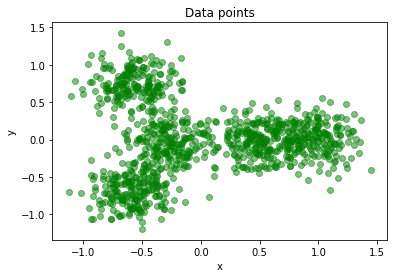

In [105]:
# plot points
plt.scatter(X_pca.T[0], X_pca.T[1], c='green', alpha=0.5)
plt.title ('Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [106]:
# find best k for k-means

best_k = -1
best_silhouette = -1
list_silhouettes = []
list_search = range(2,11)

print ("*********")
for k in list_search:
    centroids = centroids_df.iloc[:k,:4].values
    clusters = KMeans(n_clusters = k, init = centroids, max_iter=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is:", silhouette_avg)
    list_silhouettes.append(silhouette_avg)
    
    if (silhouette_avg > best_silhouette):
        best_k = k
        best_silhouette = silhouette_avg

print ("*********")    
print ('best k:', best_k)
print ('best_silhouette:', best_silhouette)
print ("*********")

*********
For n_clusters = 2 The average silhouette_score is: 0.37769968946322263
For n_clusters = 3 The average silhouette_score is: 0.4311863724028486
For n_clusters = 4 The average silhouette_score is: 0.41069673543470936
For n_clusters = 5 The average silhouette_score is: 0.36667718782054626
For n_clusters = 6 The average silhouette_score is: 0.35359359710761235


C:\anaconda\lib\site-packages\sklearn\cluster\k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


For n_clusters = 7 The average silhouette_score is: 0.4114744038836108
For n_clusters = 8 The average silhouette_score is: 0.4080486700632498
For n_clusters = 9 The average silhouette_score is: 0.2940977246492373
For n_clusters = 10 The average silhouette_score is: 0.29632951969507687
*********
best k: 3
best_silhouette: 0.4311863724028486
*********


Shilhouette plot


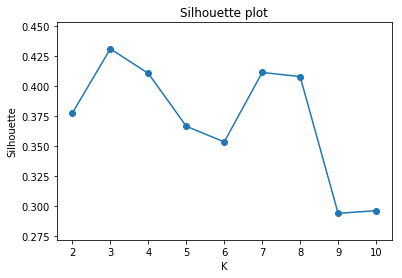

In [108]:
print ('Shilhouette plot')

plt.scatter(list_search, list_silhouettes)
plt.plot(list_search, list_silhouettes)
plt.title('Silhouette plot')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.show()

In [109]:
# labels and centroids for best k
centroids = centroids_df.iloc[:best_k,:4].values
clusters = KMeans(n_clusters = best_k, init = centroids, max_iter=10)
cluster_labels = clusters.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
clusters_centers = clusters.cluster_centers_
print ('Cluster centers:\n', clusters_centers)

Cluster centers:
 [[ 1.01324094  0.00102788 -0.00714053  0.53264751]
 [ 0.99299277  0.50426747  0.98336064 -0.00245021]
 [ 0.00395699  0.01094492  0.01261755 -0.02089099]]


C:\anaconda\lib\site-packages\sklearn\cluster\k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [110]:
centroid_centers_pca = pca.fit_transform(clusters_centers)
centroid_centers_pca

array([[-0.0955005 ,  0.61886415],
       [ 0.78082879, -0.24896601],
       [-0.68532828, -0.36989815]])

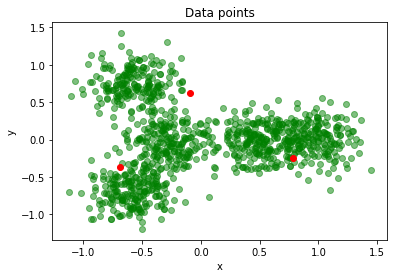

In [111]:
# plot points
plt.scatter(X_pca.T[0], X_pca.T[1], c='green', alpha=0.5)
plt.scatter(centroid_centers_pca.T[0], centroid_centers_pca.T[1], c='red', alpha=1)
plt.title ('Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()